In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np


1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

## Рекомендации по выполнению проекта

1. Проведите первичную обработку данных. Так как данных много, стоит написать функции,  
   которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют  
   на предсказываемую величину (в нашем случае — на переменную score).

In [2]:
pd.set_option('display.max_rows', 100) # показывать больше строк
pd.set_option('display.max_columns', 100) # показывать больше колонок

students = pd.read_csv('stud_math.csv')


def index_sort_a(inputstr):
    '''сортирует предоставленный список по значениям(индексу)'''
    x = int(a[a['medu'] == inputstr]['index'])
    return x

def index_sort_b(inputstr):
    '''тоже самое, только для другого столбца'''
    x = int(b[b['fedu'] == inputstr]['index'])
    return x


def get_boxplot(column):
    '''Принимает столбец с номинативными данными и создает boxplot'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
def get_stat_dif(column):
    '''Тест Стьюдента с поправкой Бонферрони'''
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки', column)
            break
            

# Первичный отсмотр данных

In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# Первичный анализ данных

In [5]:
for i in students.columns:  # проверим наличие пропусков в столбцах
    print(students.loc[:,[i]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
m

27 из 30 столбцов имеют пропуски.

In [6]:
students = students.rename(  # для удобства работы со столбцами,переименуем некоторые из них
    columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
             'Mjob': 'mjob', 'Fjob': 'fjob', 'studytime, granular': 'studytime_granular'})

In [7]:
# так как мы ориентируемся на итоговый бал, удалим строки,
# где итоговый бал отсутствует
students = students[pd.isna(students.score) == False]

In [8]:
students.school.value_counts()  # аббревиатура школы

GP    344
MS     45
Name: school, dtype: int64

Данные предоставлены из 2 школ.  

In [9]:
students.sex.value_counts()  # пол учащихся

F    204
M    185
Name: sex, dtype: int64

In [10]:
1 - 187/208

0.10096153846153844

Девушек на 10% больше чем мужчин.  

<AxesSubplot:>

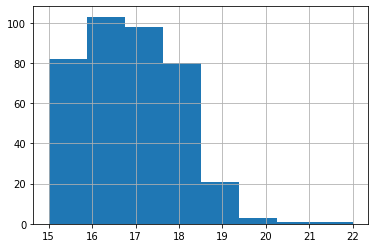

In [11]:
students.age.value_counts()  # возраст учеников
students.age.hist(bins=8)

Основной возраст учеников состовляет 15-19 лет.    

In [12]:
students.address.value_counts() # кто, где проживает

U    291
R     83
Name: address, dtype: int64

In [13]:
295/395

0.7468354430379747

Большая доля учеников проживает в городе(75%)  

In [14]:
students.famsize.value_counts() # соотношение количества семьи

GT3    255
LE3    107
Name: famsize, dtype: int64

Большая часть состоит более чем из 3 членов семьи.  

In [15]:
students.pstatus.value_counts() # доля совместного жилья родителей

T    308
A     36
Name: pstatus, dtype: int64

Практически все родители живут вместе.  
Сформировалась небольшая группа учеников(<10%), чьи родители живут раздельно  
Интересно сравнить средние баллы этих двух групп детей

In [16]:
students.medu.value_counts(), students.fedu.value_counts()  # образование матери/отца

(4.0    131
 2.0    100
 3.0     96
 1.0     56
 0.0      3
 Name: medu, dtype: int64,
 2.0     105
 3.0      94
 4.0      88
 1.0      75
 0.0       2
 40.0      1
 Name: fedu, dtype: int64)

In [17]:
students = students[students['fedu'] != 40]

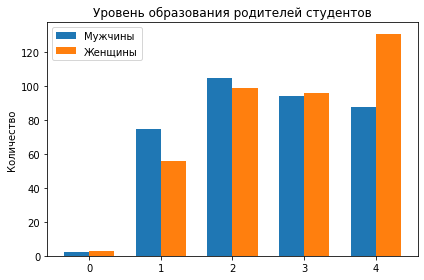

In [18]:
# создадим новые столбцы, состоящие из количества существующих значений
a = students.medu.value_counts().reset_index()
b = students.fedu.value_counts().reset_index()

men = sorted(b['fedu'], key=index_sort_b)
women = sorted(a['medu'], key=index_sort_a)
x = np.arange(5)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Мужчины')
rects2 = ax.bar(x + width/2, women, width, label='Женщины')

# добавим текста
ax.set_ylabel('Количество')
ax.set_title('Уровень образования родителей студентов')
ax.set_xticks(x)

ax.legend()


fig.tight_layout()

plt.show()

Тут уже интереснее. Женщины более образованны, чем мужчины.  
В столбце мужчин был один выброс(значение=40), скорее всего ошибка заполнения.   

Вероятно это достаточно развитая страна,  
образование женщин на высоком уровне.

In [19]:
students.mjob.value_counts(), students.fjob.value_counts()  # работа матери/отца

(other       127
 services     97
 at_home      58
 teacher      55
 health       32
 Name: mjob, dtype: int64,
 other       193
 services     99
 teacher      29
 at_home      16
 health       15
 Name: fjob, dtype: int64)

Удивительно что гос. служба в равной части у обеих групп родителей,  
хотя по миру, не смотря на прогресс, большую часть гос. должностей занимают мужчины.  

Возможно в группу 'at_home'(не работает) вкючено и домохозяйство,  
это, в некой мере, объяснило бы перевес женщин(в 4 раза) в данной категории.

In [20]:
students.reason.value_counts()  # причина выбора школы

course        135
reputation    101
home          101
other          34
Name: reason, dtype: int64

Cтуденты не готовы ехать 'на другой край земли' ради одной лишь репутации.  

In [21]:
students.guardian.value_counts()  # кто является опекуном

mother    248
father     85
other      24
Name: guardian, dtype: int64

In [22]:
248/students.guardian.count()

0.6946778711484594

 Не понятно какой смысл несет слово 'опекун' в данной таблице.  
 Предположим что опекун - это основное ответственное лицо,  
 отвечающее за воспитание и безопасность.  
 Получается, ответственность на матерях лежит за 70% детей

In [23]:
students.traveltime.value_counts()  # время в пути до школы

1.0    239
2.0     94
3.0     20
4.0      7
Name: traveltime, dtype: int64

<AxesSubplot:>

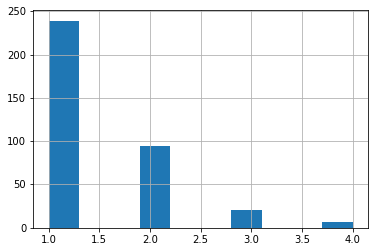

In [24]:
students.traveltime.hist()

Большая часть учеников живет в пределах 30 минут от школы.

In [25]:
students.studytime.value_counts()  # сколько времени занимаются учебой вне школы

2.0    189
1.0    103
3.0     62
4.0     27
Name: studytime, dtype: int64

Большая часть не занимается учебой вне школы.  

In [26]:
students.failures.value_counts()  # кол-во неудач вне школы

0.0    289
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

Вполне возможно, что у большинства учеников количество неудач больше чем 3 

In [27]:
students.schoolsup.value_counts()  # доп. образовательная поддержка

no     330
yes     49
Name: schoolsup, dtype: int64

У большей части учеников нет доп. обр. поддержки.

In [28]:
students.famsup.value_counts()  # доп. семейная образовательная поддержка

yes    215
no     135
Name: famsup, dtype: int64

In [29]:
215 / students.famsup.count()

0.6142857142857143

А вот тут ситуация обратна,  
62% учеников имеют семейную образовательную поддержку

In [30]:
students.paid.value_counts()  # доп. платные занятия по матиматике

no     196
yes    153
Name: paid, dtype: int64

In [31]:
students.activities.value_counts()  # доп. внеучебные занятия

yes    191
no     183
Name: activities, dtype: int64

In [32]:
students.nursery.value_counts()  # ходили ли в детский сад

yes    296
no      77
Name: nursery, dtype: int64

Практически 20% не ходили в детский сад.

In [33]:
students.studytime_granular.value_counts()  # неизвестный столбец

-6.0     189
-3.0     103
-9.0      62
-12.0     27
Name: studytime_granular, dtype: int64

<AxesSubplot:>

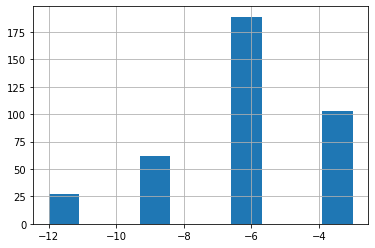

In [34]:
students.studytime_granular.hist()

In [35]:
students.higher.value_counts()  # хочет ли получить высшее образование 

yes    349
no      19
Name: higher, dtype: int64

In [36]:
students.internet.value_counts()  # наличие интернета дома

yes    299
no      55
Name: internet, dtype: int64

In [37]:
students.romantic.value_counts()  # состоят ли в отношениях

no     234
yes    123
Name: romantic, dtype: int64

In [38]:
students.famrel.value_counts()  # семейные отношения

 4.0    178
 5.0     96
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

<AxesSubplot:>

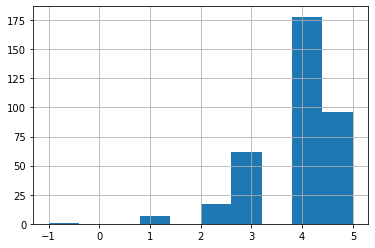

In [39]:
students.famrel.hist()

In [40]:
students = students[students['famrel'] != -1]  # удалим выброс

Был обнаружен выброс(-1)

In [41]:
students.freetime.value_counts()  # свободное время

3.0    152
4.0    110
2.0     61
5.0     37
1.0     18
Name: freetime, dtype: int64

<AxesSubplot:>

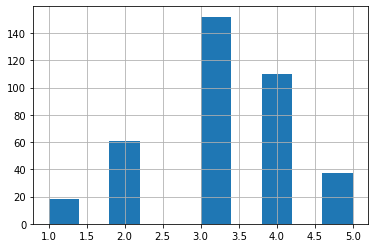

In [42]:
students.freetime.hist()

In [43]:
students.goout.value_counts()  # проведенное время с друзьями

3.0    126
2.0     99
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64

<AxesSubplot:>

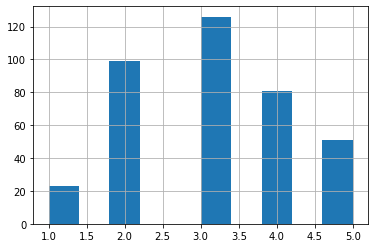

In [44]:
students.goout.hist()

In [45]:
students.health.value_counts()  # состояние здоровья

5.0    136
3.0     88
4.0     59
1.0     47
2.0     42
Name: health, dtype: int64

<AxesSubplot:>

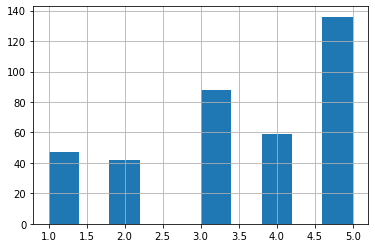

In [46]:
students.health.hist()

In [47]:
81/389

0.20822622107969152

21% учеников чувствуют себя неудовлетворительно.

In [48]:
students.absences.value_counts()  # количество пропущенных занятий 

0.0      110
2.0       60
4.0       51
6.0       30
8.0       20
10.0      17
12.0      12
14.0      11
3.0        7
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [49]:
students.absences.agg(['min', 'max'])  # узнаем максимальное значение и проверим минимальное

min      0.0
max    385.0
Name: absences, dtype: float64

In [50]:
students.score.describe()  # посмотрим структуру столбца с оценками

count    387.000000
mean      52.273902
std       22.966464
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

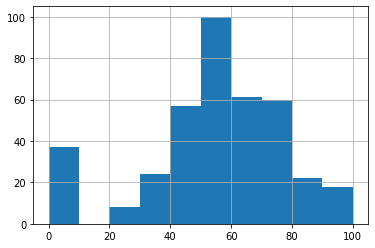

In [51]:
students.score.hist()

In [52]:
# посмотрим сколько человек получили бал ниже 40
(students[students['score']< 40]['score'].value_counts()).sum()

69

# Подведем промежуточные итоги.

Были обнаружены выбросы. В столбце 'fedu': 40 и в столбце 'famrel': -1  
Данные предоставлены из 2 школ.  
Ответственность на матерях лежит за 70% детей  
Основной возраст учеников состовляет 15-19 лет.  
Большая доля учеников проживает в городе(75%)  
Сформировалась небольшая группа учеников(<10%), чьи родители живут раздельно.  
Женщины более образованны, чем мужчины(родители).  
Гос. служба в равной части у обеих групп родителей  
Студенты не готовы ехать 'на другой край земли' ради одной лишь репутации учебного заведения.  
Большая часть учеников живет в пределах 30 минут от школы.  
Большая часть не занимается учебой вне школы.  
Вполне возможно, что у большинства учеников количество неудач больше чем 3  
2/3 учеников имеют семейную образовательную поддержку.  
Практически 20% не ходили в детский сад.  
21% учеников чувствуют себя неудовлетворительно.

# Корреляционный анализ

In [53]:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.150715,-0.148780,0.081428,-0.016096,0.209946,0.016096,0.059431,0.010130,0.116953,-0.065713,0.096808,-0.155802
medu,-0.150715,1.000000,0.626223,-0.164093,0.081263,-0.238950,-0.081263,-0.007900,0.033847,0.068918,-0.045761,-0.013801,0.213341
fedu,-0.148780,0.626223,1.000000,-0.143233,0.011383,-0.271349,-0.011383,-0.026481,-0.014459,0.053675,0.018910,0.021945,0.129376
traveltime,0.081428,-0.164093,-0.143233,1.000000,-0.116639,0.057971,0.116639,-0.047812,-0.020622,0.037593,-0.012357,-0.047201,-0.074205
studytime,-0.016096,0.081263,0.011383,-0.116639,1.000000,-0.174639,-1.000000,0.025578,-0.126336,-0.054370,-0.077175,-0.024452,0.113496
failures,0.209946,-0.238950,-0.271349,0.057971,-0.174639,1.000000,0.174639,0.002089,0.099168,0.113938,0.082325,0.056663,-0.343385
studytime_granular,0.016096,-0.081263,-0.011383,0.116639,-1.000000,0.174639,1.000000,-0.025578,0.126336,0.054370,0.077175,0.024452,-0.113496
famrel,0.059431,-0.007900,-0.026481,-0.047812,0.025578,0.002089,-0.025578,1.000000,0.167514,0.067812,0.099761,-0.081341,0.050228
freetime,0.010130,0.033847,-0.014459,-0.020622,-0.126336,0.099168,0.126336,0.167514,1.000000,0.291681,0.069446,0.011320,0.018501
goout,0.116953,0.068918,0.053675,0.037593,-0.054370,0.113938,0.054370,0.067812,0.291681,1.000000,-0.014366,-0.047721,-0.130630


Пока пропустим корреляцию столбцов 'studytime' и 'studytime_granular'.  

1. Интересный момент: есть корреляция оценки и уровня образования матери,  
больше чем с уровнем образования отца и это можно объяснить.  
Матери, с их высоким уровнем образования, являются основными опекунами,  
прибавим к этому то, что у 62% детей есть семейная образовательная  
поддержка(в которой, скорее всего, выступают матери) и вот вам  
корреляция оценки за экзамен и уровня образования матери.  


2. Дополнительное время потраченное на учебу вне школы благоприятно влияет на итоговый балл,  
а проведенное время с друзьями влияет ровным счетом наоборот.  


3. Заметна обратная корреляция количества неудач и итоговой оценки экзамена,  
то есть, чем больше неудач вне школы, тем меньше балл. Портит весь эффект то,  
что в этом столбце '0' означает как 0, так и больше 3 неудач.  
Стоит более подробно исследовать этот пункт.  


5. Обратная корреляция с возрастом. Высокий возраст учеников может объясняться тем,  
что они оставались на второй год(если это возможно в данных учреждениях),  
то есть именно из-за низкой успеваемости. 

In [54]:
students[students['age']>19].corr()  # посмотрим только на учеников постарше

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.196116,-0.918559,-0.375000,-0.562500,0.684653,0.562500,NaN,-0.408248,0.687500,-0.866845,-0.320512,-0.648537
medu,-0.196116,1.000000,0.480384,0.686406,0.539319,-0.358057,-0.539319,NaN,-0.720577,0.049029,-0.088697,-0.284638,0.672283
fedu,-0.918559,0.480384,1.000000,0.408248,0.612372,-0.745356,-0.612372,NaN,0.166667,-0.408248,0.738549,0.370326,0.737558
traveltime,-0.375000,0.686406,0.408248,1.000000,0.875000,0.000000,-0.875000,NaN,-0.612372,-0.375000,-0.075378,-0.260038,0.416917
studytime,-0.562500,0.539319,0.612372,0.875000,1.000000,0.000000,-1.000000,NaN,-0.408248,-0.250000,0.075378,0.238872,0.277945
failures,0.684653,-0.358057,-0.745356,0.000000,0.000000,1.000000,0.000000,NaN,-0.372678,0.456435,-0.825723,0.041956,-0.888047
studytime_granular,0.562500,-0.539319,-0.612372,-0.875000,-1.000000,0.000000,1.000000,NaN,0.408248,0.250000,-0.075378,-0.238872,-0.277945
famrel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freetime,-0.408248,-0.720577,0.166667,-0.612372,-0.408248,-0.372678,0.408248,NaN,1.000000,-0.408248,0.738549,0.365389,-0.018912
goout,0.687500,0.049029,-0.408248,-0.375000,-0.250000,0.456435,0.250000,NaN,-0.408248,1.000000,-0.678401,0.311441,-0.532727


In [55]:
students[students['age']>19]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


Что можно вынести из этой таблицы?    
1. Количество неудач не стоит учитывать из-за не состоятельности данных.  
2. У 4-ых из 5 неизвестен опекун и те же 4 выбирают учебное заведение на основе его репутации.     
3. Количество пропущенных занятий напрямую влияет на оценку, так же как и состояние здоровья в данный момент.  
4. Образование родителей все еще важно. В данной группе у всех отцов низкое образование.  


Но выборка слишком маленькая и делать выводы, основываясь только на ней, не стоит

### Так, самое время порассуждать, что же означает столбец 'studytime_granular'.  
Есть полная обратная корреляция с временем затраченным на обучение вне школы.  
То есть, чем больше ученик учился вне школы, тем меньше он тратил времени на "это".  
Так как у нас уже есть: время с друзьями, свободное время после школы и отношения с родителями,  
то значение этого столбца ближе к стрельбе козявками в потолок. Если бы это было так,  
то появятся вопросы: почему же это не включено в "отдых после школы"?  
Поэтому на данный момент я склоняюсь к версии, что это время потраченное на какой либо кружок или секцию.

# Анализ номинативных переменных

Посмотрим, различаются ли распределения итогового былла в зависимости от значения этих переменных.

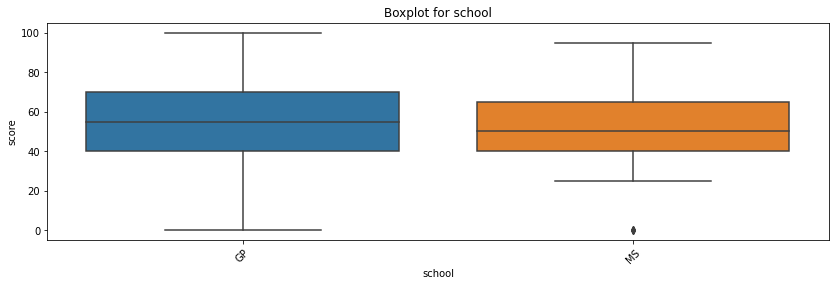

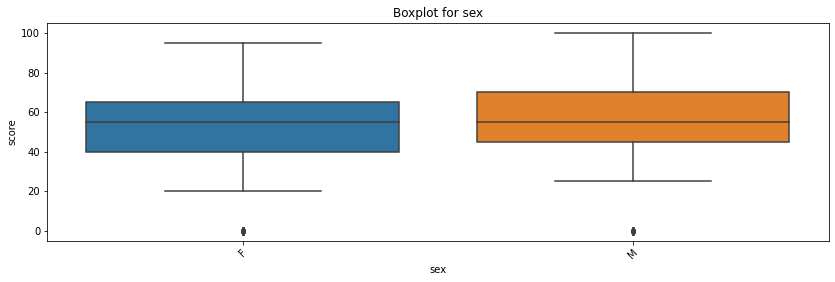

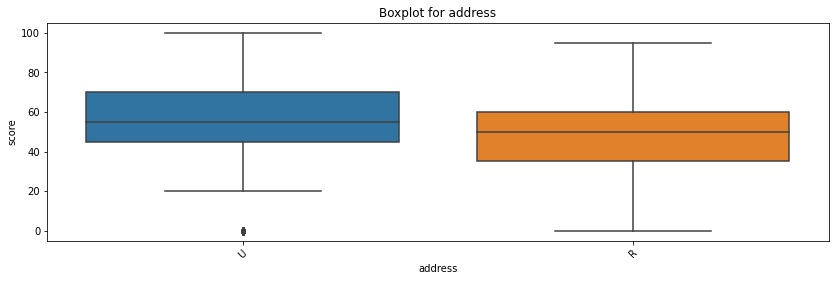

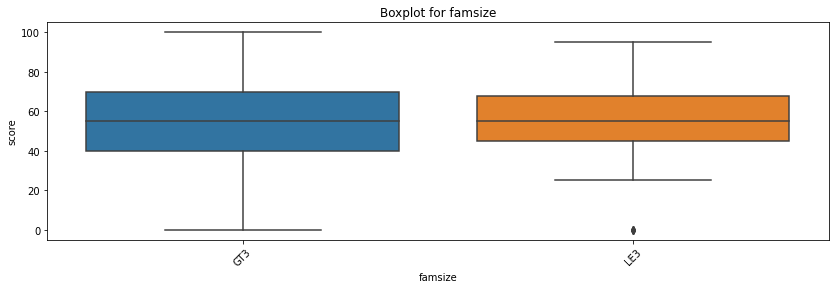

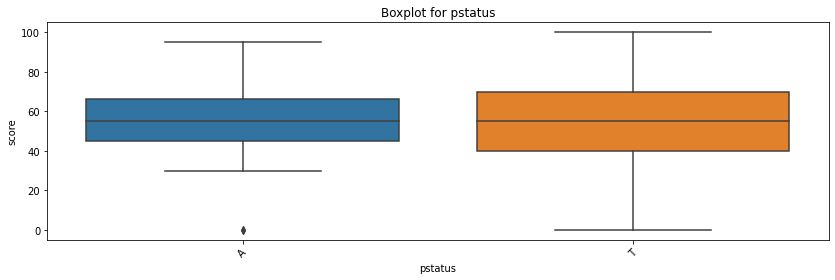

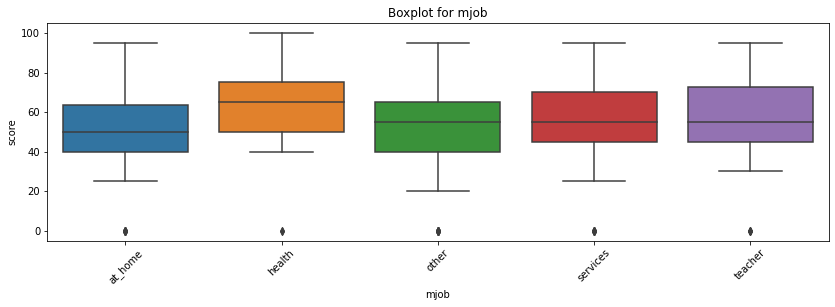

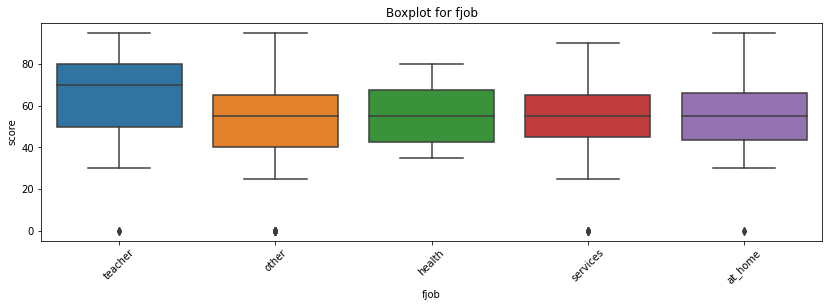

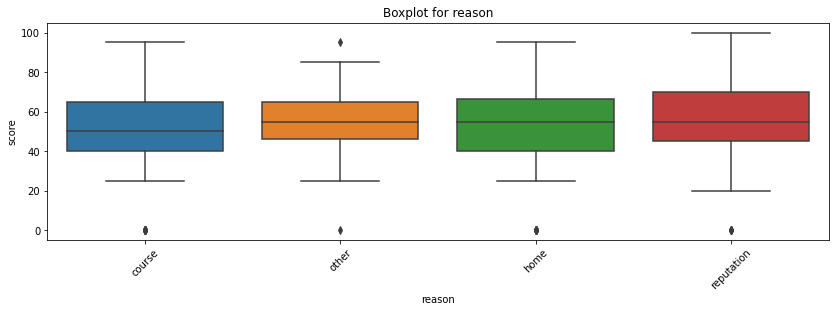

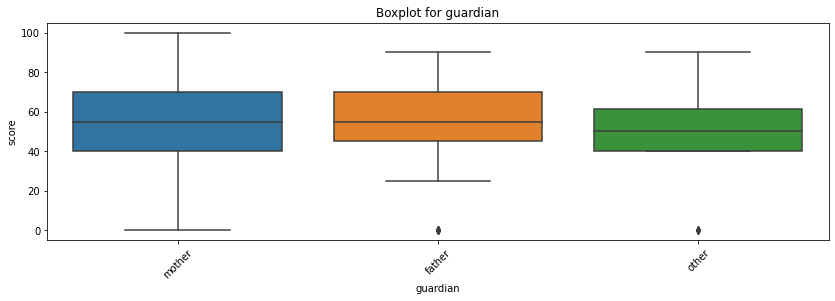

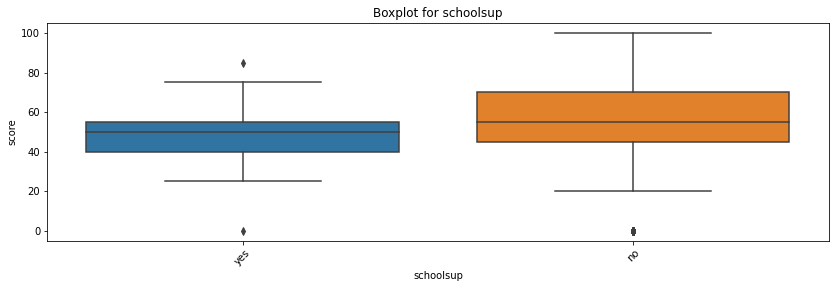

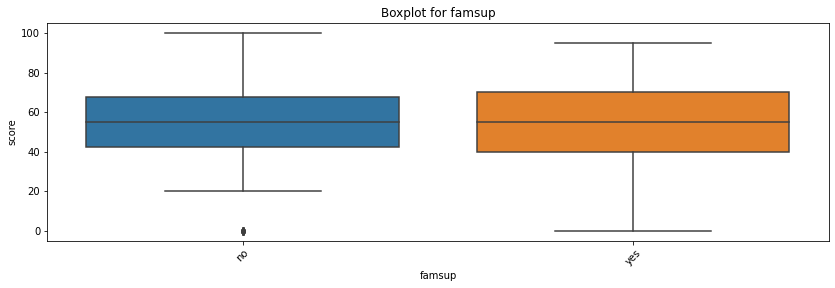

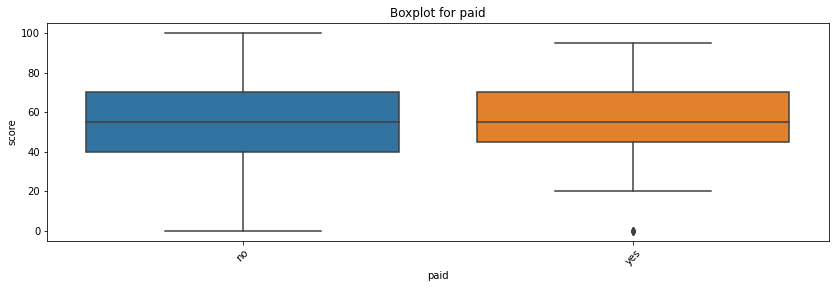

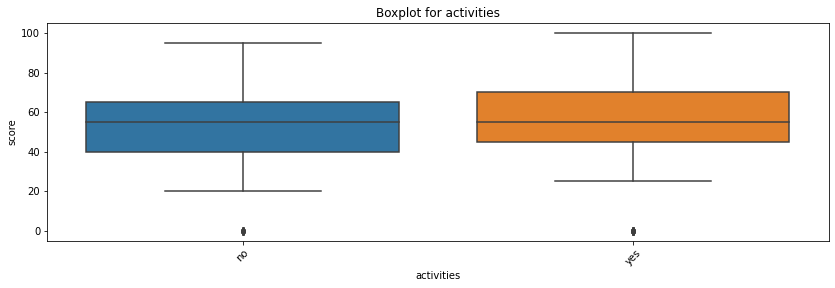

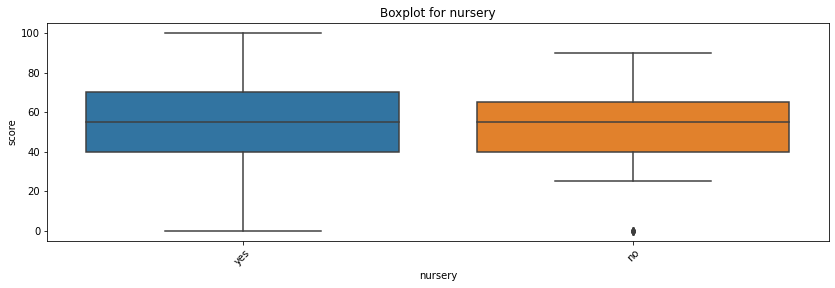

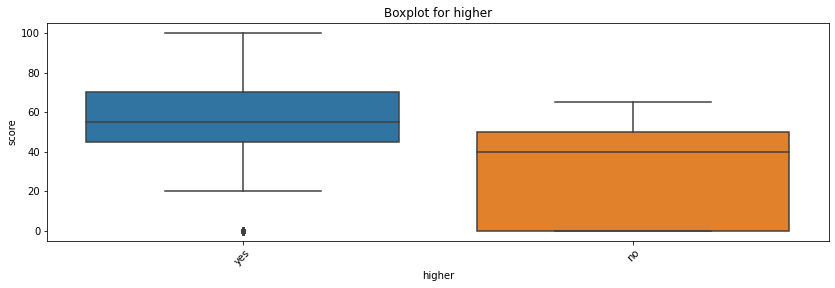

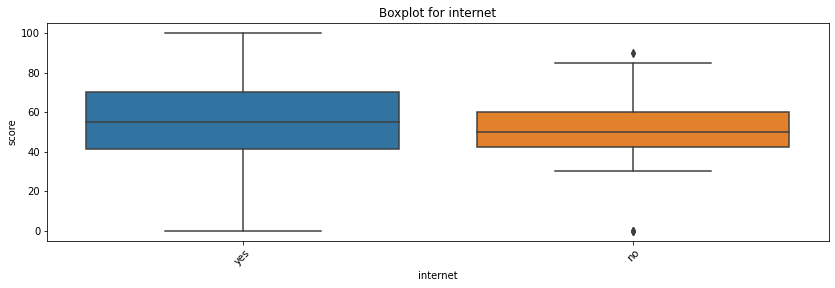

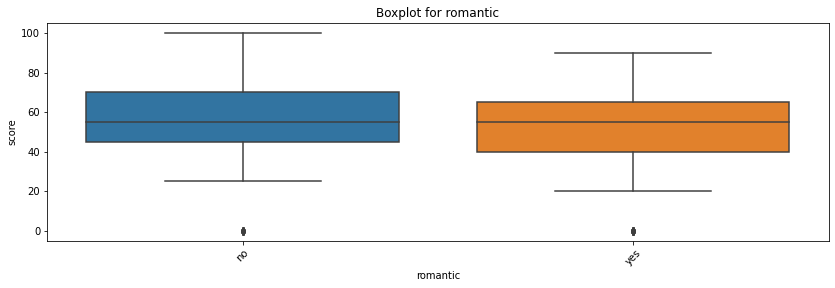

In [56]:
# прогоним boxplot для каждого возможного столбца
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента

In [57]:
# проверим каждый возможный столбец
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 
 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Сформируем новый датасет с переменными, которые, возможно, влияют на оценку.

In [58]:
students_for_model = students.loc[:, ['age', 'address', 'medu', 'fedu', 'mjob',
                                      'studytime', 'failures','studytime_granular',
                                      'higher', 'goout', 'romantic','score']]

In [59]:
students_for_model = students_for_model.reset_index()  #сбросим индексы

In [60]:
# удалим столбец со старыми индексами
students_for_model.drop(['index'], inplace=True, axis=1)
students_for_model  # вот наш обновленный датасет

,age,address,medu,fedu,mjob,studytime,failures,studytime_granular,higher,goout,romantic,score
0,18,U,4.0,4.0,at_home,2.0,0.0,-6.0,yes,4.0,no,30.0
1,17,U,1.0,1.0,at_home,2.0,0.0,-6.0,yes,3.0,no,30.0
2,15,U,1.0,1.0,at_home,2.0,3.0,-6.0,yes,2.0,NaN,50.0
3,15,U,4.0,2.0,health,3.0,0.0,-9.0,yes,2.0,yes,75.0
4,16,U,3.0,3.0,other,2.0,0.0,-6.0,yes,2.0,no,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
382,20,U,2.0,2.0,services,2.0,2.0,-6.0,yes,4.0,no,45.0
383,17,U,3.0,1.0,services,1.0,0.0,-3.0,yes,5.0,no,80.0
384,21,R,1.0,1.0,other,1.0,3.0,-3.0,NaN,3.0,no,35.0
385,18,R,3.0,2.0,services,1.0,0.0,-3.0,yes,1.0,no,50.0


# Выводы

### В результате EDA для анализа влияния параметров на  итоговый балл экзамена по математике были получены следующие выводы:

* В данных достаточно мало пустых значений, в редких случаях их количество было больше 10%  


* Выбросы найдены только в столбцах с образованием отца и семейными отношениями,  
  что позволяет сделать вывод о том, что данные достаточно чистые.
  
  
* Корреляция между параметрами medu/fedu и score может говорить о том,  
  что родители оказывваю прямое влияние на своего ребенка. 
  
  
* С возрастом заметна обратная корреляция, вполне возможно с возрастом ученику  
  сложнее сосредоточится непосредственно на учебе.  
  
  
* Дополнительное время потраченное на учебу вне школы благоприятно влияет на итоговый балл,  
  а проведенное время с друзьями влияет ровным счетом наоборот.
  
  
* Кол-во пропущенных занятий оказывает влияние на итоговый бал  


* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это  
  age, address, medu, fedu, mjob, studytime, failures, studytime_granular, higher , goout, 
  romantic.  
  
  
* Неизвестный столбец studytime_granular, предположительно, говорит о потраченном времени на кружок или секцию